In [2]:
import pickle
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime

In [3]:
list_num_user = [1000]
list_exp_type = ["fair"]

In [4]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 400


In [11]:
def clean(k):
    k = k.str.strip("@10")
    k = k.str.replace("_our","")
    k = k.str.replace("_ori","")
    k = k.str.replace("_true","")
    k = k.str.replace("_div","$_{\div}$", regex=False)
    k = k.str.replace("_mul","$_{\\times}$", regex=False)
    return k

def forward(x):
    return x**(1/6)

def inverse(x):
    return x**6 * np.sign(x)

def modify(lab):
    if lab in ["IBO","Jain", "FSat", "QF", "Ent"]:
        lab = "$\\uparrow$"+lab
    elif lab in ["IWO", "Gini","HD"]:
        lab = "$\\downarrow$"+lab
    return lab

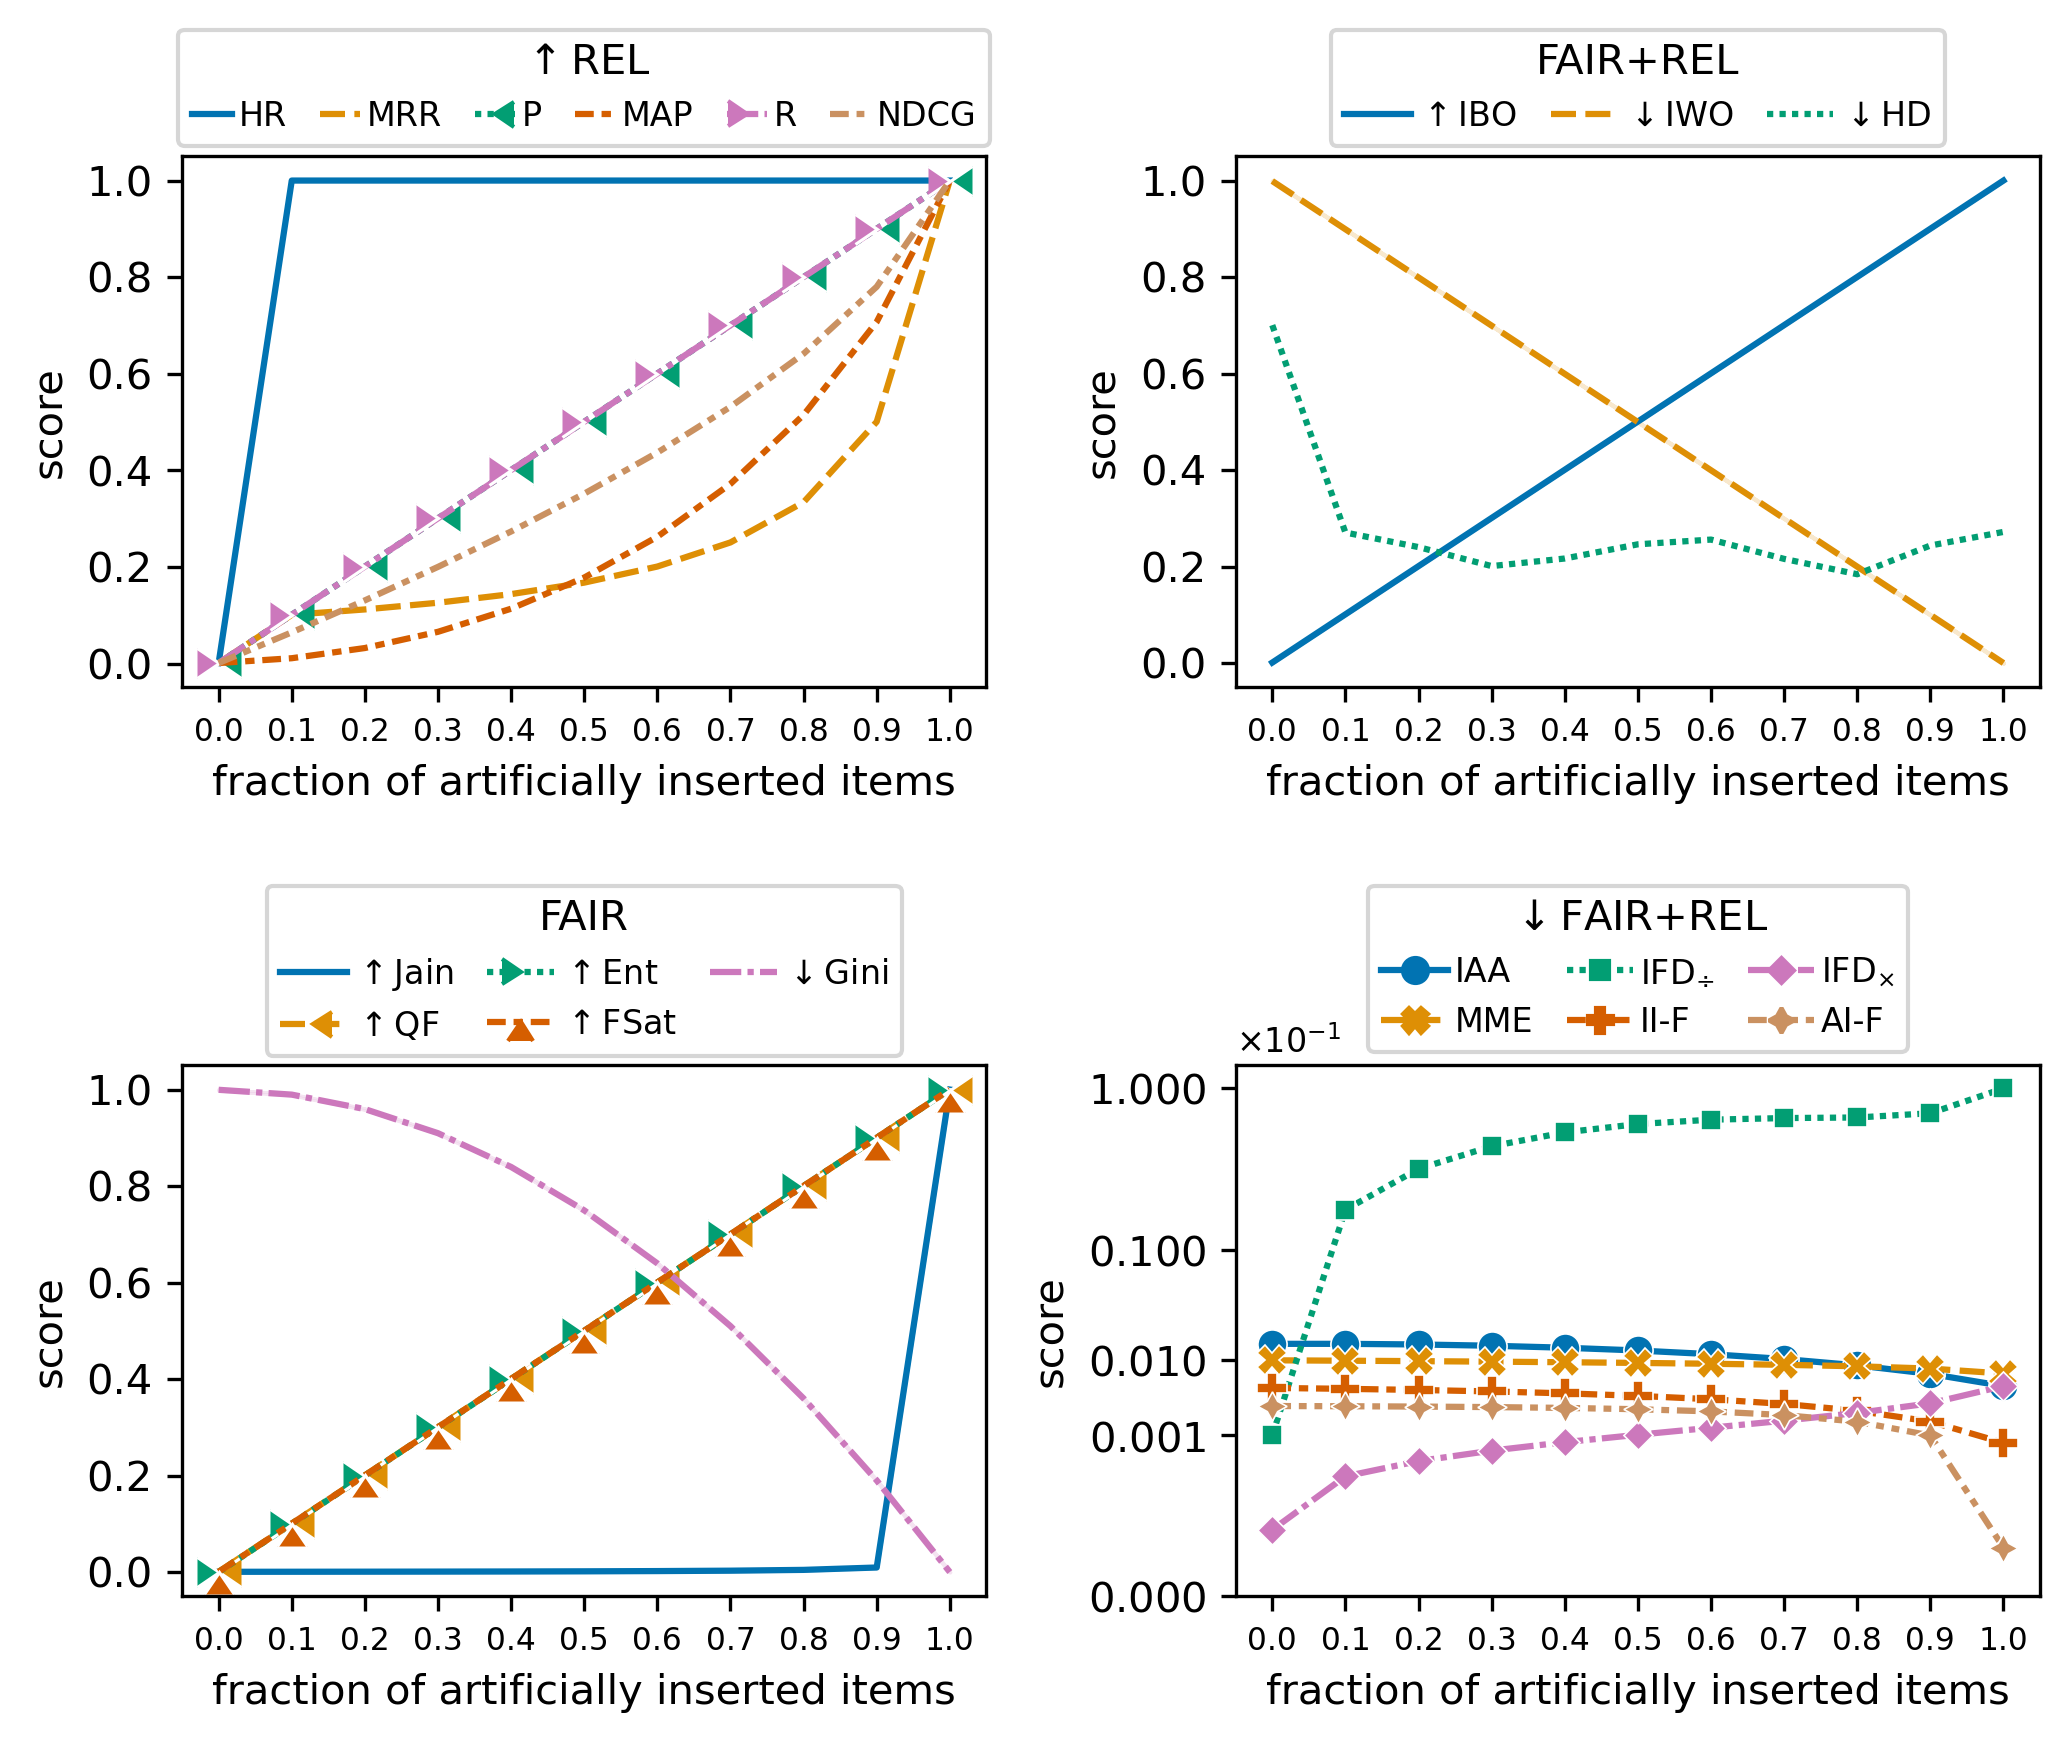

In [49]:
plotting_dict = {"x":"position", "y":"score", "hue":"measure", "palette":"colorblind","markersize":7}

for exp_type in list_exp_type:
    for num_user in list_num_user:
        fig, axes = plt.subplot_mosaic("AB;DE", figsize=(7,6))

        with open(f"artificial_insertion/{exp_type}_user_{str(num_user).zfill(4)}_exact_km.pickle", "rb") as f:
            result = pickle.load(f)

        df = pd.DataFrame(result)
        df.columns = df.columns.astype(int) / 10
        df.index = clean(df.index)
        df = df.unstack().reset_index()
        df.columns = ["position","measure","score"]
        df = df.set_index("measure")

        with open(f"artificial_insertion_stable_HD/{exp_type}_user_{str(num_user).zfill(4)}_exact_km.pickle", "rb") as f:
            result_HD = pickle.load(f)

        df_HD = pd.DataFrame(result_HD)
        df_HD.columns = df_HD.columns.astype(int) / 10
        df_HD.index = clean(df_HD.index)
        df_HD = df_HD.unstack().reset_index()
        df_HD.columns = ["position","measure","score"]
        df_HD = df_HD.set_index("measure")

        df = pd.concat([df, df_HD.loc["HD_stable"]])

        selected_index = df.index.unique()

        rel_measures = ['HR', 'MRR', 'P', 'MAP', 'R', 'NDCG']

        fair_measures = ['Jain', 'QF', 'Ent', 'FSat', 'Gini']

        joint_group1 = ["IBO", "IWO", "HD"]
        joint_group3 = ['IAA', 'MME','IFD$_{\div}$','II-F',
                        'IFD$_{\\times}$', 'AI-F']

        thisdata = df

        rel_result = thisdata.loc[rel_measures].reset_index()
        fair_result = thisdata.loc[fair_measures].reset_index()
        joint_group1_result = thisdata.loc[joint_group1].reset_index()
        joint_group3_result = thisdata.loc[joint_group3].reset_index()

        

        sns.lineplot(data=rel_result, ax=axes["A"], style="measure", markers=["","",4,"", 5,""], **plotting_dict)
        sns.lineplot(data=fair_result, ax=axes["D"], style="measure",  markers=["",4,5,6,""], **plotting_dict)
        sns.lineplot(data=joint_group1_result, ax=axes["B"], style="measure", **plotting_dict)
        sns.lineplot(data=joint_group3_result, ax=axes["E"], style="measure", markers=True, mew=0.4,**plotting_dict)


        axes["E"].set_yscale('function', functions=(forward,inverse))

        for this_ax in axes.values():

            this_ax.set_xlabel("fraction of artificially inserted items")
            this_ax.set(xticks=np.linspace(0, 1, num=11))
            this_ax.tick_params(axis='x', which='major', labelsize=7.5, rotation=0)

        handles, ori_labels = axes["D"].get_legend_handles_labels()
        new_labels = [modify(lab) for lab in ori_labels]
        axes["D"].legend(handles, new_labels, title=f"FAIR",  ncols=3,columnspacing=1, fontsize=8, handletextpad=0.2,loc="upper center", bbox_to_anchor=(0.5, 1.37))     

        handles, ori_labels = axes["B"].get_legend_handles_labels()
        new_labels = [modify(lab) for lab in ori_labels]
        axes["B"].legend(handles, new_labels,title=f"FAIR+REL", ncols=3,columnspacing=1, fontsize=8, handletextpad=0.2,loc="upper center", bbox_to_anchor=(0.5, 1.27))    

        axes["A"].legend(title="$\\uparrow$REL", ncols=6,columnspacing=1, fontsize=8, handletextpad=0.2,loc="upper center", bbox_to_anchor=(0.5, 1.27), handlelength=1.2)     
        axes["E"].legend(title="$\\downarrow$FAIR+REL", ncols=3,columnspacing=1, fontsize=8, handletextpad=0.2,loc="upper center", bbox_to_anchor=(0.5, 1.37))     

        axes["E"].set_yticks([0, 10**-4, 10**-3, 10**-2, 0.1])
        axes["E"].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
        axes["E"].yaxis.get_offset_text().set_fontsize(8)


        fig.tight_layout()    
        fig.show()
            
        now = datetime.now()
        time = str(now.strftime("%Y-%m-%d_%H%M%S"))
        fig.savefig(f"artificial_insertion/insert_{exp_type}_{time}.pdf",bbox_inches="tight")   

In [ ]:
import pandas as pd
import pickle

with open(f"artificial_insertion/fair_user_1000_exact_km.pickle", "rb") as f:
    result = pickle.load(f)

df = pd.DataFrame(result)
df.columns = df.columns.astype(int) /10
df.index = df.index.str.strip("@10")
df['is_monotonic_increasing?']=df.apply(lambda x:x.is_monotonic_increasing,axis=1)
df['is_monotonic_decreasing?']=df.apply(lambda x:x.is_monotonic_decreasing,axis=1)

In [4]:
df.round(6)

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,is_monotonic_increasing?,is_monotonic_decreasing?
HR,0.001000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,False
MRR,0.001000,0.100900,0.112000,0.125875,0.143714,0.167500,0.200800,0.250750,0.334000,0.500500,1.000000,True,False
P,0.001000,0.100900,0.200800,0.300700,0.400600,0.500500,0.600400,0.700300,0.800200,0.900100,1.000000,True,False
MAP,0.001000,0.010990,0.032080,0.065658,0.113506,0.178005,0.262484,0.371938,0.514692,0.707396,1.000000,True,False
R,0.001000,0.100900,0.200800,0.300700,0.400600,0.500500,0.600400,0.700300,0.800200,0.900100,1.000000,True,False
NDCG,0.001000,0.064557,0.130745,0.200107,0.273397,0.351717,0.436775,0.531469,0.641405,0.780128,1.000000,True,False
Jain_ori,0.001000,0.001111,0.001250,0.001428,0.001666,0.001998,0.002496,0.003326,0.004980,0.009911,1.000000,True,False
Jain_our,0.000000,0.000111,0.000250,0.000428,0.000666,0.000999,0.001498,0.002328,0.003984,0.008920,1.000000,True,False
QF_ori,0.001000,0.100900,0.200800,0.300700,0.400600,0.500500,0.600400,0.700300,0.800200,0.900100,1.000000,True,False
QF_our,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000,True,False
